### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"F:\Ineuron DS\Assignment\Music Genre\data.csv")

In [3]:
## Checking top 5 rows

df.head(5)


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [6]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,-8.921949,36.293063,-1.146627,14.634083,-5.129624,10.119876,-6.995752,7.730251,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,21.695015,16.666987,12.222555,11.840802,9.941638,10.464090,8.284181,7.937977,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,-89.901142,-18.768461,-38.903451,-28.424546,-32.933588,-24.947537,-31.653059,-12.051190,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,-24.223791,24.107395,-9.974552,5.097782,-12.870050,1.609752,-13.249849,1.621692,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,-10.716073,36.957074,-0.015239,15.007553,-5.717005,9.663922,-7.512299,7.151456,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,5.505793,48.212826,7.920911,23.857726,2.974185,18.708671,-0.383367,14.399350,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,56.666090,80.691273,31.461661,45.173178,21.835769,49.018887,19.129207,27.216746,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


### EDA

In [5]:
# missing values 

df.isnull().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

#### Tempo Distribution

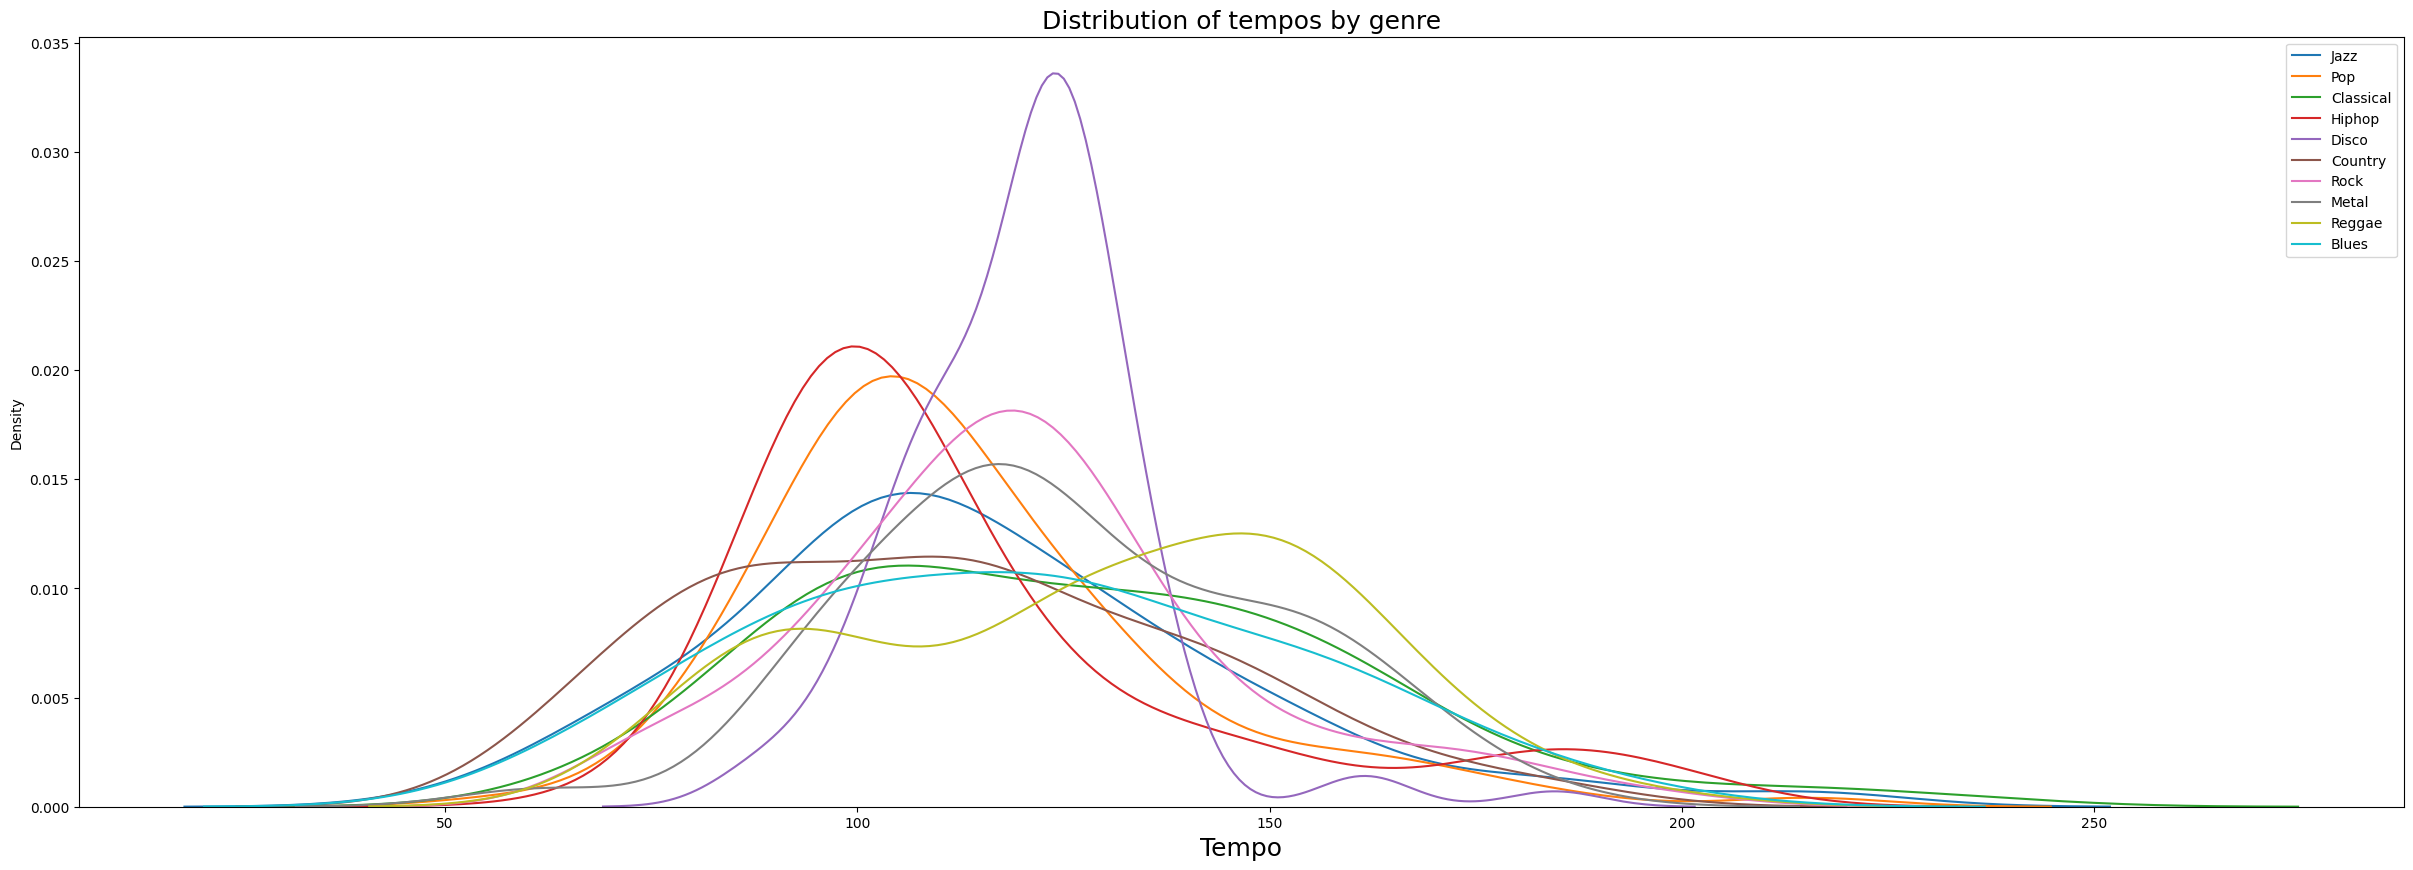

In [13]:
plt.figure(figsize=(30,10))

sns.kdeplot(df.loc[df['label']=='jazz', 'tempo'], label="Jazz")
sns.kdeplot(df.loc[df['label']=='pop', 'tempo'], label="Pop")
sns.kdeplot(df.loc[df['label']=='classical', 'tempo'], label="Classical")
sns.kdeplot(df.loc[df['label']=='hiphop', 'tempo'], label="Hiphop")
sns.kdeplot(df.loc[df['label']=='disco', 'tempo'], label="Disco")
sns.kdeplot(df.loc[df['label']=='country', 'tempo'], label="Country")
sns.kdeplot(df.loc[df['label']=='rock', 'tempo'], label="Rock")
sns.kdeplot(df.loc[df['label']=='metal', 'tempo'], label="Metal")
sns.kdeplot(df.loc[df['label']=='reggae', 'tempo'], label="Reggae")
sns.kdeplot(df.loc[df['label']=='blues', 'tempo'], label="Blues")

plt.title("Distribution of tempos by genre", fontsize = 18)

plt.xlabel("Tempo", fontsize = 18)

plt.legend()

* Here we can see the differences in tempo distribution between some different genres.
* Most have fairly normal distributions with peaks around 100 BPM.
* Disco is distinctly different, with a peak closer to 150 BPM.
* Classical and Jazz are the most diverse, having less prominent peaks and a wider spread of tempos.

#### Spectral Centroid Distribution

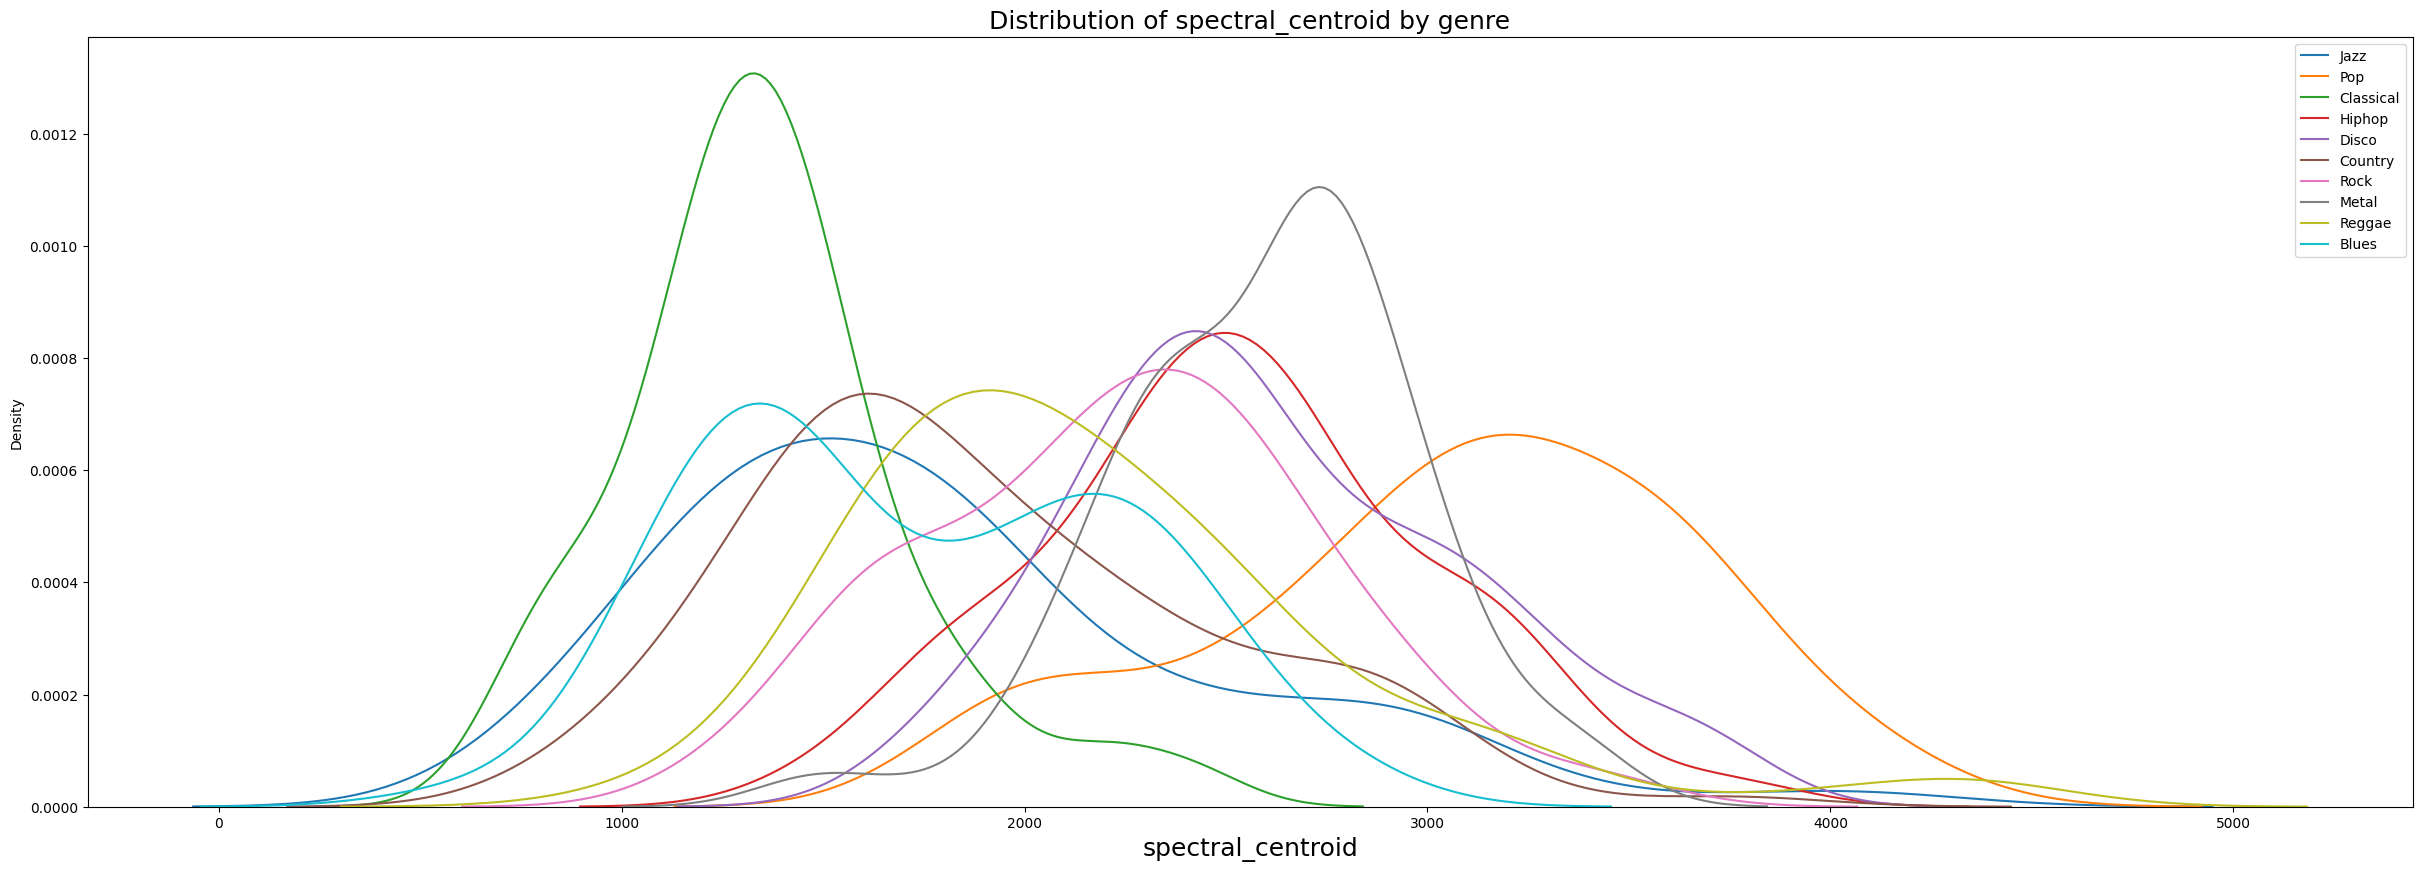

In [16]:
plt.figure(figsize=(30,10))

sns.kdeplot(df.loc[df['label']=='jazz', 'spectral_centroid'], label="Jazz")
sns.kdeplot(df.loc[df['label']=='pop', 'spectral_centroid'], label="Pop")
sns.kdeplot(df.loc[df['label']=='classical', 'spectral_centroid'], label="Classical")
sns.kdeplot(df.loc[df['label']=='hiphop', 'spectral_centroid'], label="Hiphop")
sns.kdeplot(df.loc[df['label']=='disco', 'spectral_centroid'], label="Disco")
sns.kdeplot(df.loc[df['label']=='country', 'spectral_centroid'], label="Country")
sns.kdeplot(df.loc[df['label']=='rock', 'spectral_centroid'], label="Rock")
sns.kdeplot(df.loc[df['label']=='metal', 'spectral_centroid'], label="Metal")
sns.kdeplot(df.loc[df['label']=='reggae', 'spectral_centroid'], label="Reggae")
sns.kdeplot(df.loc[df['label']=='blues', 'spectral_centroid'], label="Blues")

plt.title("Distribution of spectral_centroid by genre", fontsize = 18)

plt.xlabel("spectral_centroid", fontsize = 18)

plt.legend()

* Songs in the classical, jazz, and country genres seem to trend toward lower spectral centroids, while pop, disco, hiphop, and metal songs tend to have higher centroids. It's possible that high spectral centroids could be correlated with catchy songs that grab your attention with high frequencies, while low spectral centroids correlate with low-toned, more relaxed music that is more common in classical, jazz, and country.¶
* The classical and metal genres both have fairly low variance, implying that they are less diverse in terms of spectral centroids.
* The distributions of classical and metal have very little overlap. We could discern between these two genres fairly accurately even if we only used this feature.

#### Spectral Bandwidth Distribution

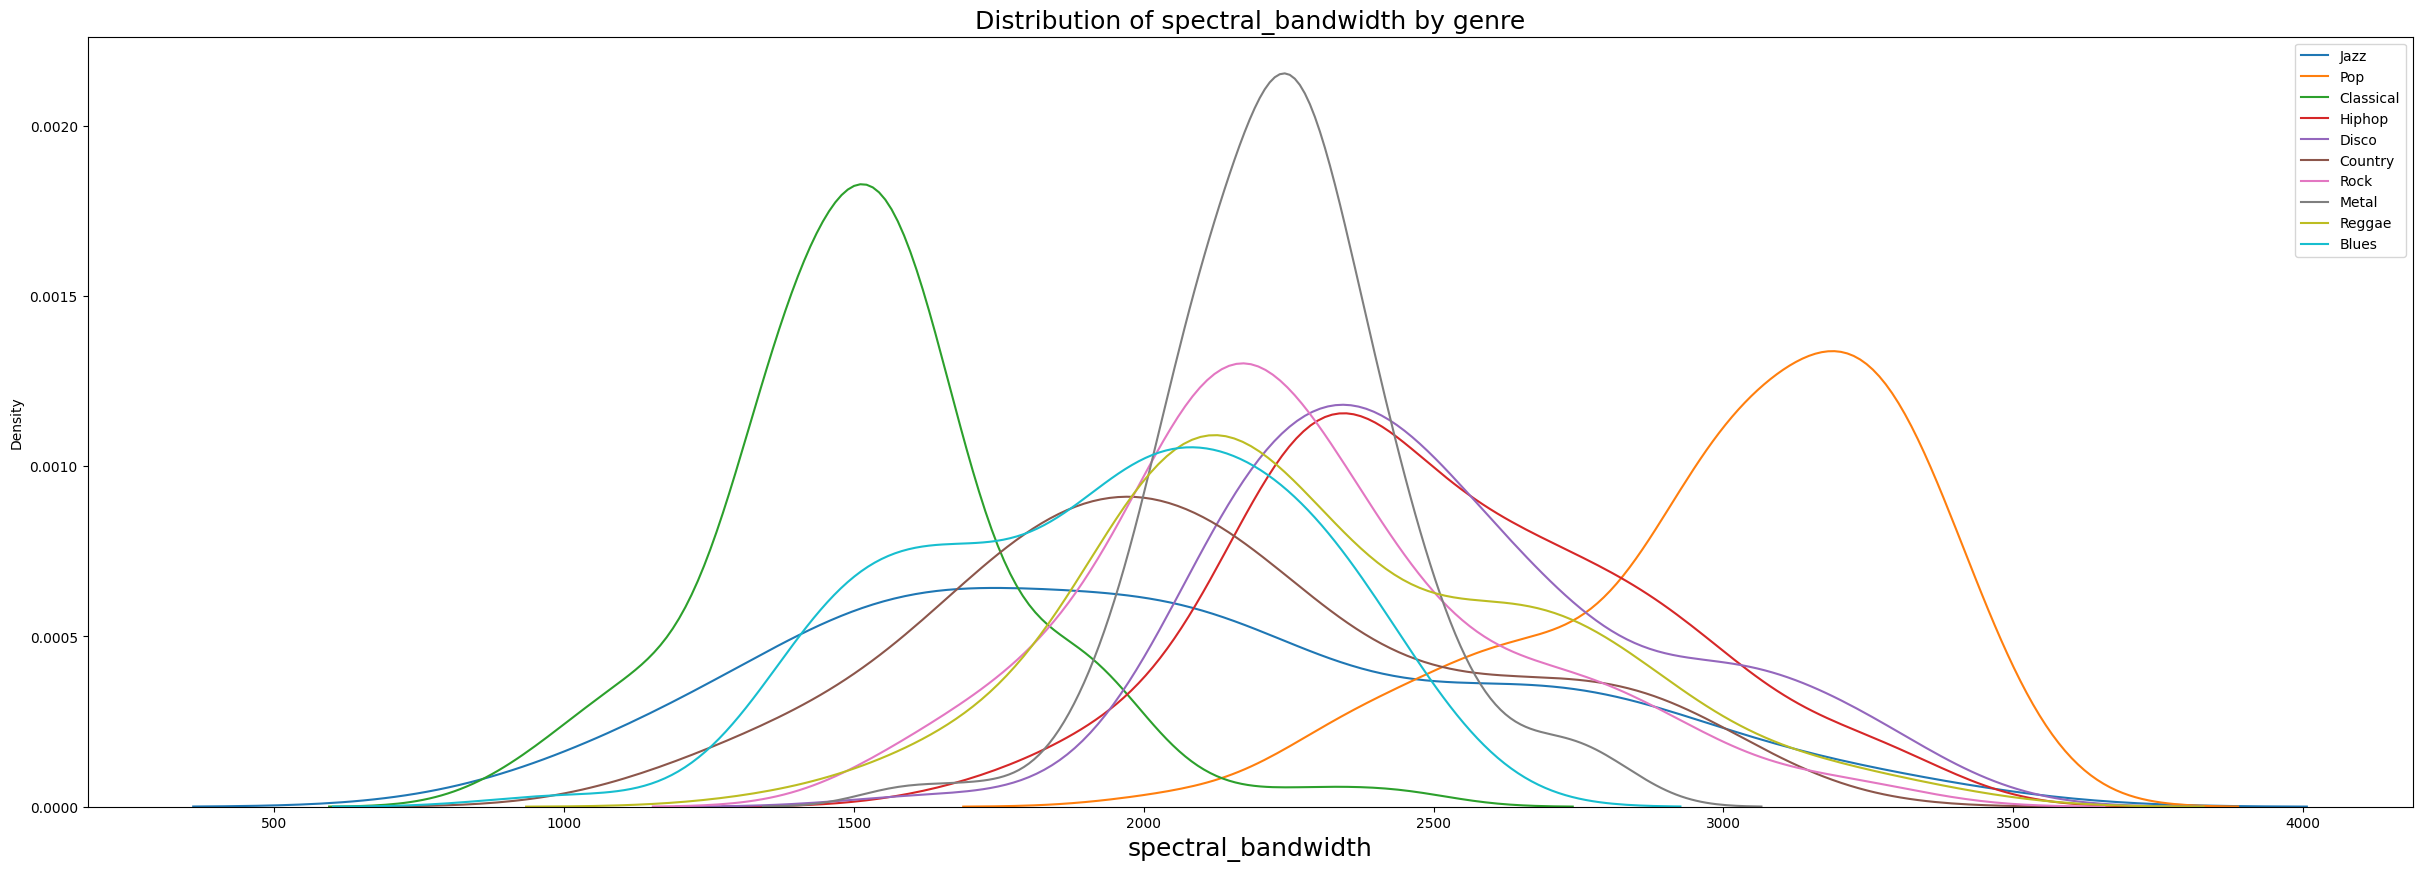

In [17]:
plt.figure(figsize=(30,10))

sns.kdeplot(df.loc[df['label']=='jazz', 'spectral_bandwidth'], label="Jazz")
sns.kdeplot(df.loc[df['label']=='pop', 'spectral_bandwidth'], label="Pop")
sns.kdeplot(df.loc[df['label']=='classical', 'spectral_bandwidth'], label="Classical")
sns.kdeplot(df.loc[df['label']=='hiphop', 'spectral_bandwidth'], label="Hiphop")
sns.kdeplot(df.loc[df['label']=='disco', 'spectral_bandwidth'], label="Disco")
sns.kdeplot(df.loc[df['label']=='country', 'spectral_bandwidth'], label="Country")
sns.kdeplot(df.loc[df['label']=='rock', 'spectral_bandwidth'], label="Rock")
sns.kdeplot(df.loc[df['label']=='metal', 'spectral_bandwidth'], label="Metal")
sns.kdeplot(df.loc[df['label']=='reggae', 'spectral_bandwidth'], label="Reggae")
sns.kdeplot(df.loc[df['label']=='blues', 'spectral_bandwidth'], label="Blues")

plt.title("Distribution of spectral_bandwidth by genre", fontsize = 18)

plt.xlabel("spectral_bandwidth", fontsize = 18)

plt.legend()

* Interestingly, there are three very distinct peaks in this graph: classical, metal, and pop. Their distributions have relatively low variance, and they have little overlap with each other, meaning that this feature will be useful in distinguishing them.¶
* Most classical songs have a smaller spectral bandwidth. This could be due to many classical songs being played by a single instrument, such as piano, limiting the tonal range.
* Pop songs tend to have higher bandwidths. This may be because most pop songs include multiple instruments and vocal parts

#### Rolloff Distribution

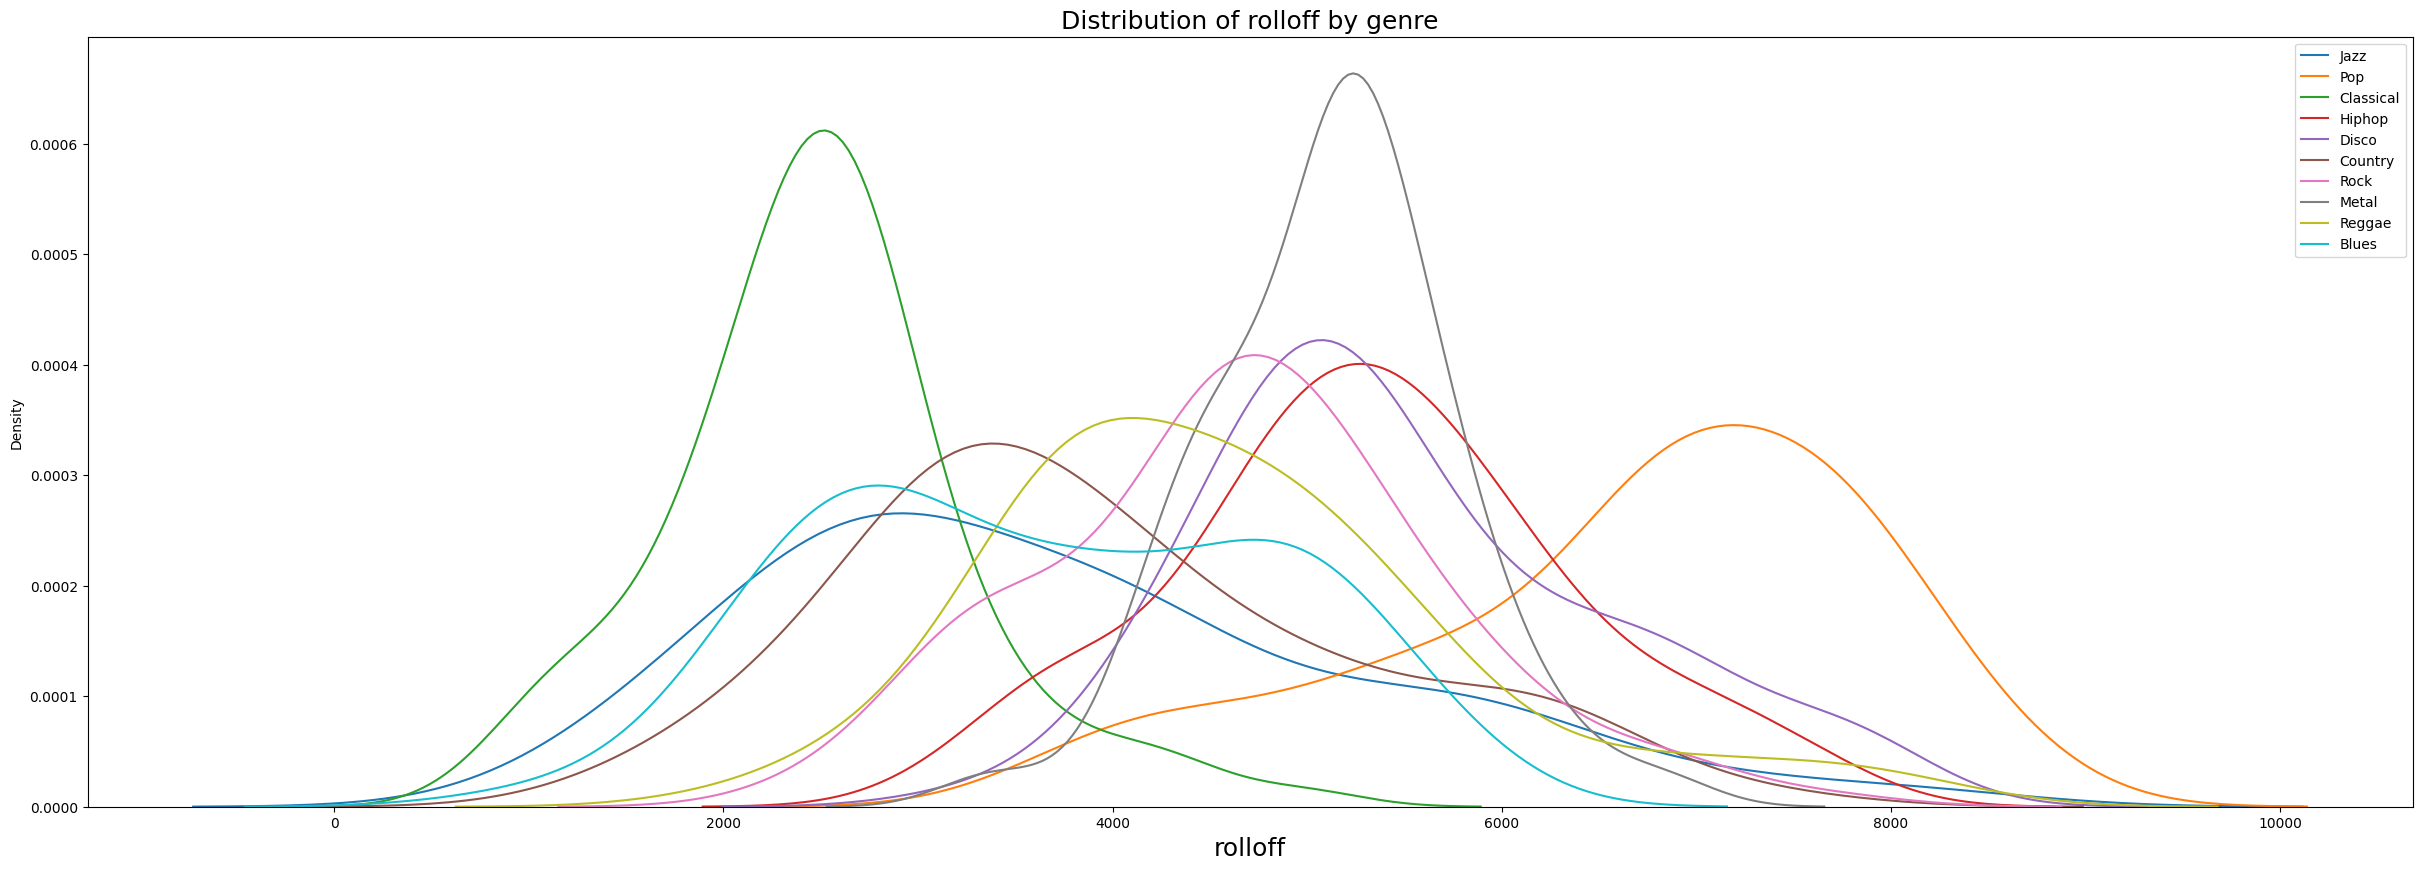

In [19]:
plt.figure(figsize=(30,10))

sns.kdeplot(df.loc[df['label']=='jazz', 'rolloff'], label="Jazz")
sns.kdeplot(df.loc[df['label']=='pop', 'rolloff'], label="Pop")
sns.kdeplot(df.loc[df['label']=='classical', 'rolloff'], label="Classical")
sns.kdeplot(df.loc[df['label']=='hiphop', 'rolloff'], label="Hiphop")
sns.kdeplot(df.loc[df['label']=='disco', 'rolloff'], label="Disco")
sns.kdeplot(df.loc[df['label']=='country', 'rolloff'], label="Country")
sns.kdeplot(df.loc[df['label']=='rock', 'rolloff'], label="Rock")
sns.kdeplot(df.loc[df['label']=='metal', 'rolloff'], label="Metal")
sns.kdeplot(df.loc[df['label']=='reggae', 'rolloff'], label="Reggae")
sns.kdeplot(df.loc[df['label']=='blues', 'rolloff'], label="Blues")

plt.title("Distribution of rolloff by genre", fontsize = 18)

plt.xlabel("rolloff", fontsize = 18)

plt.legend()

* The rolloff distributions looks almost the same as the spectral bandwidth distributions. This very likely indicates a correlation between the two.
* Pop, disco, hiphop, and metal have high rolloff. This seems to support my theory about "crisp" sounding music

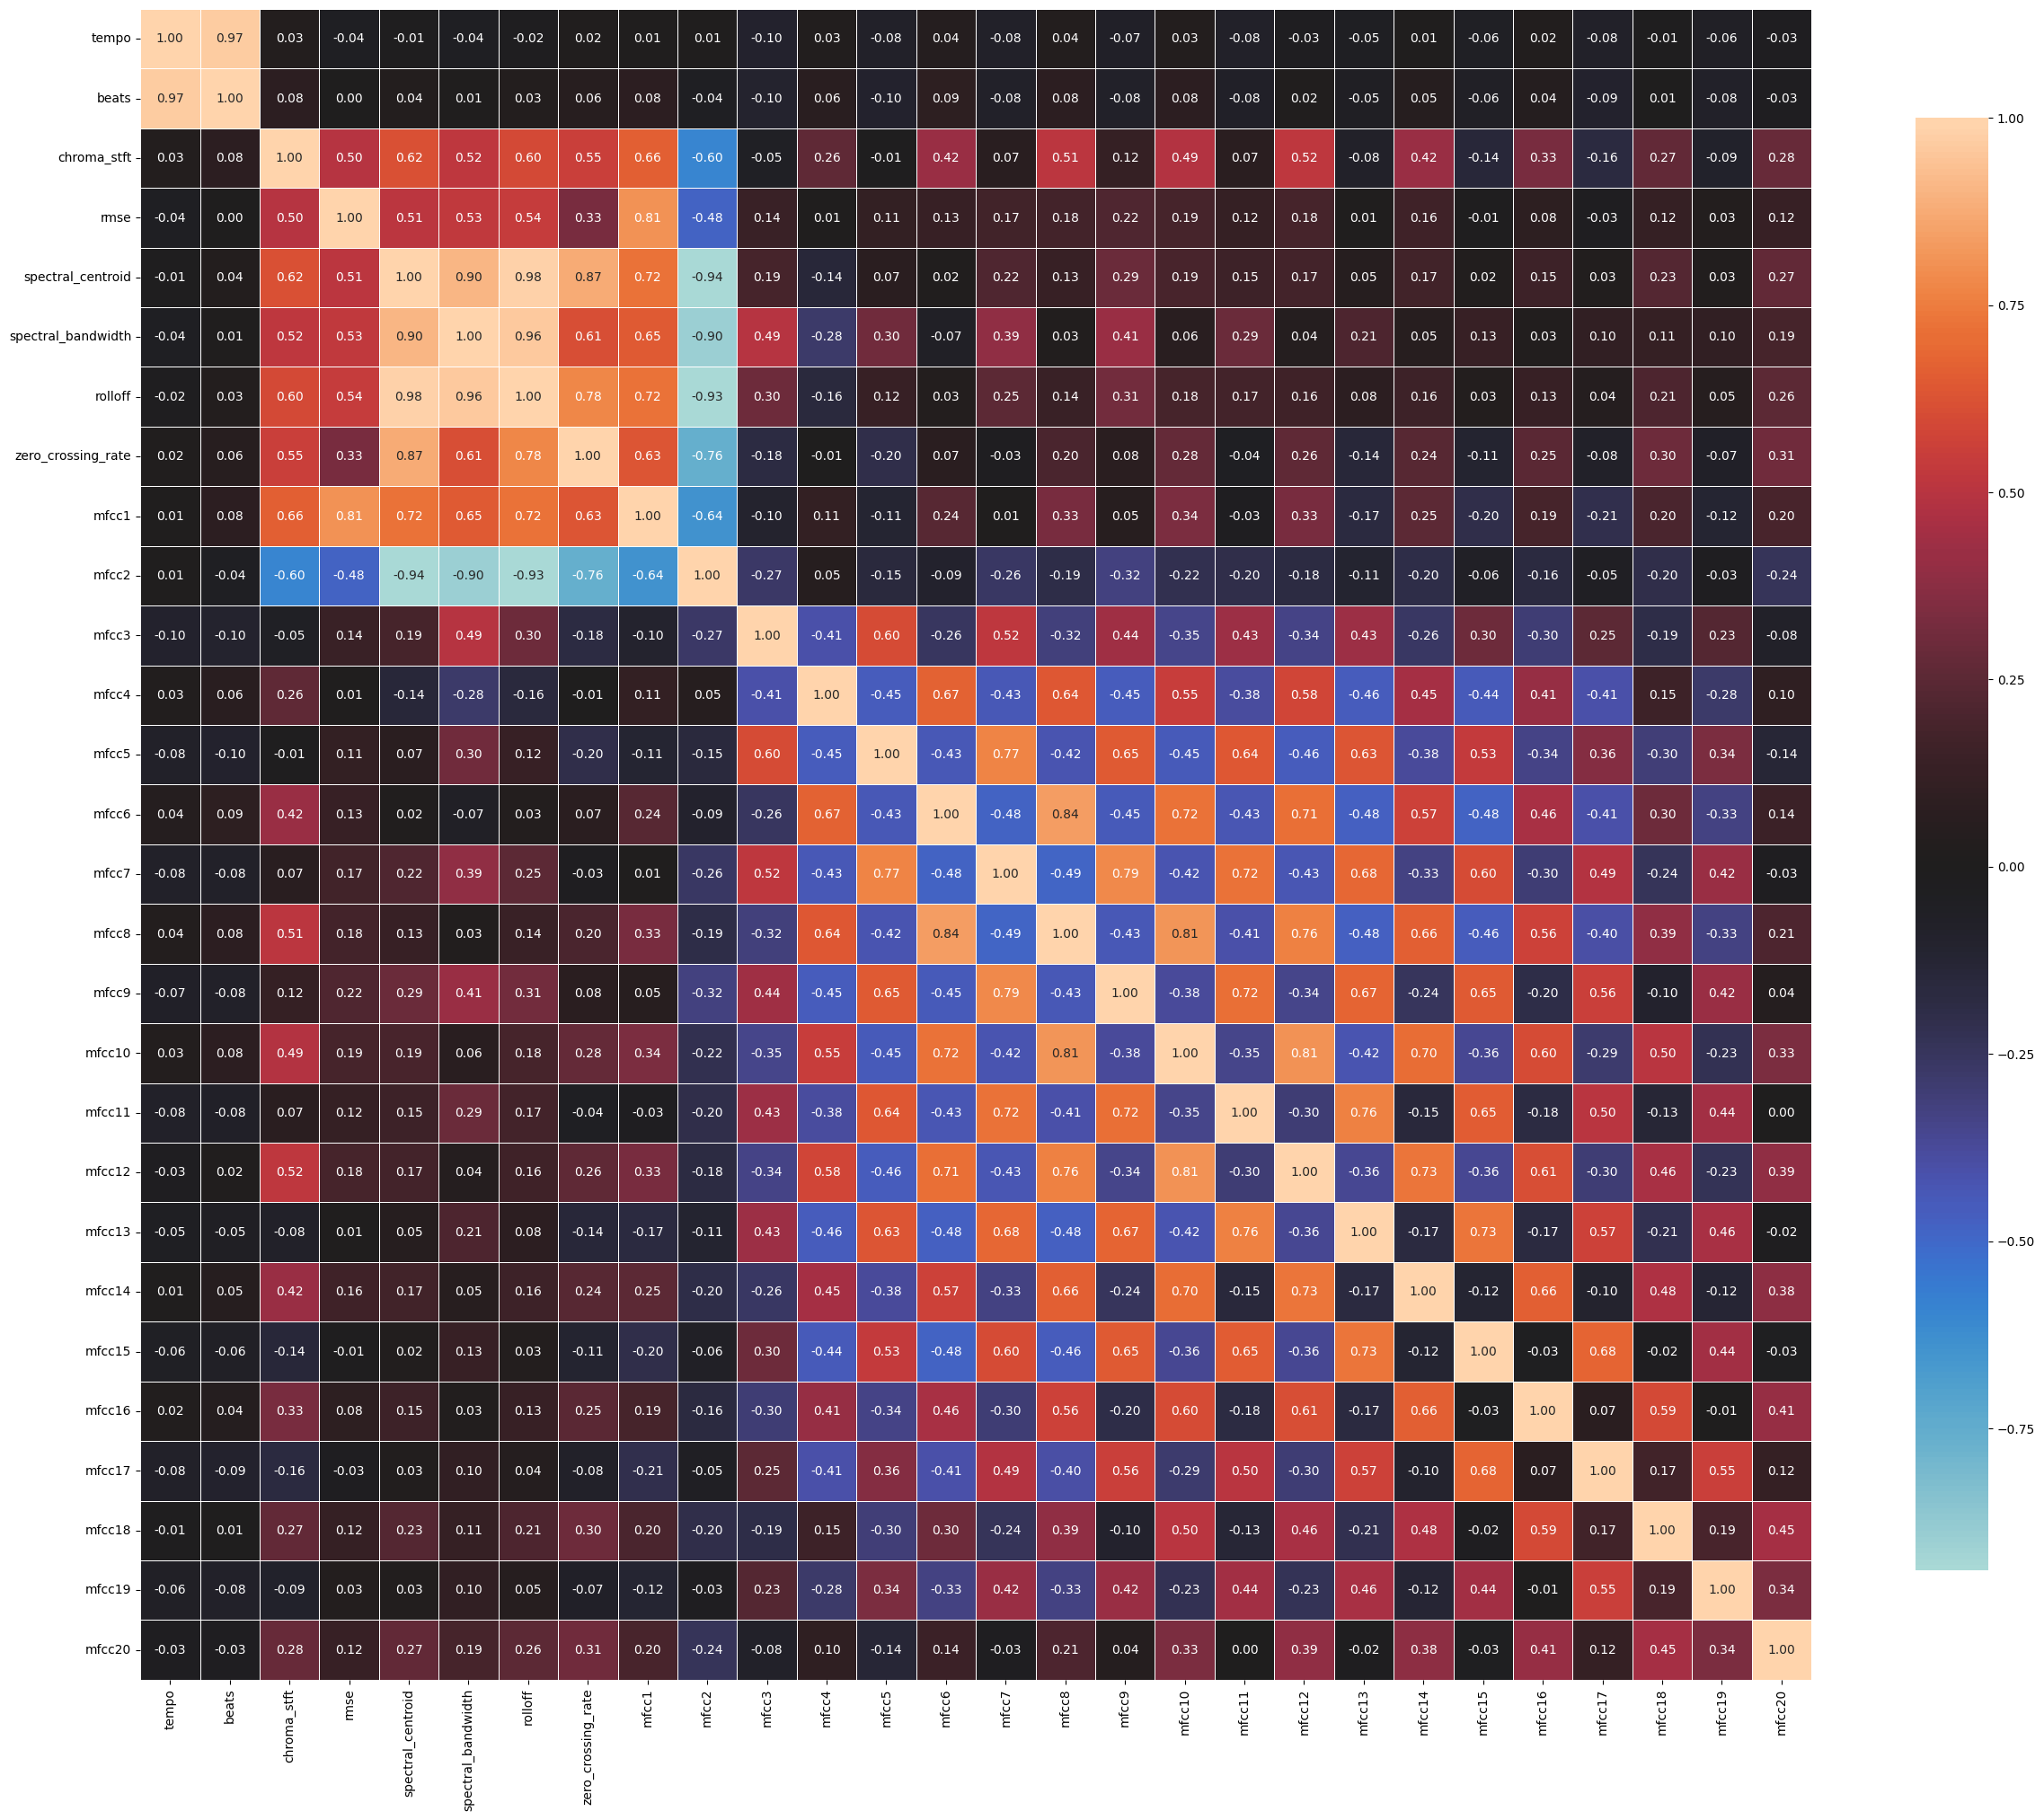

In [21]:
correlations = df.corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

* we can see that rolloff is strongly correlated with both spectral centroid and spectral bandwidth.
* Not sure what the difference between tempo and beats is, but there seems to be some minor discrepancy.
* We can also see that there is also a fairly strong correlation between spectral bandwidth and centroid
* I would have expected the correlation between zero crossing rate and spectral centroid to be higher, since they are both dependent on frequency.